In [71]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Bring in pickled dataframe with features and target

In [72]:
with open("df_model_data.pkl","rb") as picklefile:
    df_model_data = pickle.load(picklefile)

### Create Features: 
* **Season, Month, Month_Year_Count** using ReleaseDate
    * **Month_Year_Count** is number of other movies released during that same month and year
* Convert **Actor, Director**, and **Production Company** fields to Dummy variable "IsPopular" 

In [73]:
def season(date_time):
    month = date_time.month
    if month in [12,1,2]:
        season = "Winter"
    if month in [3,4,5]:
        season = "Spring"
    if month in [6,7,8]:
        season = "Summer"
    if month in [9,10,11]:
        season = "Fall" 
    
    return season

In [74]:
df_model_data["Rel_Season"] = df_model_data["ReleaseDate"].apply(season)
df_model_data["Rel_Month"] = df_model_data["ReleaseDate"].apply(lambda x: x.month)
df_model_data["Month_Year"] = df_model_data["ReleaseDate"].apply(lambda x: str(x.month) + "_" + str(x.year))
df_model_data["Month_Year_Count"] = df_model_data["Month_Year"].apply(lambda x: df_model_data["Month_Year"].str.count(x).sum())

### Create dummy variables for Rating, Month, Season, Genre

In [ ]:
df_model_data = pd.get_dummies(df_model_data, columns = ["Rating","Rel_Month","Rel_Season","Lead_Genre"],
                               drop_first=True)

In [77]:
df_model_data.sample(5)

,Title,Budget,ReleaseDate,Runtime,Lead_Actor,Director,Prod_Company,Domestic_Sales,Intl_Sales,Global_Sales,...,Lead_Genre_Drama,Lead_Genre_Family,Lead_Genre_Fantasy,Lead_Genre_Horror,Lead_Genre_Music,Lead_Genre_Mystery,Lead_Genre_Romance,Lead_Genre_Sci-Fi,Rel_Season,Rel_Month
2059,Exodus: Gods And Kings (2014),140000000,2014-12-12,150,Christian Bale,Ridley Scott,Chernin Entertainment,65014513,203161118,268175631,...,0,0,0,0,0,0,0,0,Winter,12
2558,Bad Moms (2016),20000000,2016-07-29,100,Mila Kunis,Jon Lucas,STX Entertainment,113257297,70678777,183936074,...,0,0,0,0,0,0,0,0,Summer,7
262,Little Miss Sunshine (2006),8000000,2006-08-18,101,Abigail Breslin,Jonathan Dayton,Fox Searchlight Pictures,59891098,41167856,101058954,...,0,0,0,0,0,0,0,0,Summer,8
1835,Epic (2013),100000000,2013-05-24,102,Blake Anderson,Chris Wedge,Twentieth Century Fox Animation,107518682,160907952,268426634,...,0,0,0,0,0,0,0,0,Spring,5
703,Madagascar: Escape 2 Africa (2008),150000000,2008-11-07,89,Ben Stiller,Eric Darnell,DreamWorks Animation,180010950,423889404,603900354,...,0,0,0,0,0,0,0,0,Fall,11


### Exploratory Data Analysis

In [78]:
df_model_data.columns

Index(['Title', 'Budget', 'ReleaseDate', 'Runtime', 'Lead_Actor', 'Director',
       'Prod_Company', 'Domestic_Sales', 'Intl_Sales', 'Global_Sales',
       'Net_Profit', 'Month_Year', 'Month_Year_Count', 'Is_Pop_Actor',
       'Is_Pop_Director', 'Is_Pop_ProdComp', 'Rating_NC-17', 'Rating_PG',
       'Rating_PG-13', 'Rating_R', 'Rel_Month_2', 'Rel_Month_3', 'Rel_Month_4',
       'Rel_Month_5', 'Rel_Month_6', 'Rel_Month_7', 'Rel_Month_8',
       'Rel_Month_9', 'Rel_Month_10', 'Rel_Month_11', 'Rel_Month_12',
       'Rel_Season_Spring', 'Rel_Season_Summer', 'Rel_Season_Winter',
       'Lead_Genre_Adventure', 'Lead_Genre_Animation', 'Lead_Genre_Biography',
       'Lead_Genre_Comedy', 'Lead_Genre_Crime', 'Lead_Genre_Documentary',
       'Lead_Genre_Drama', 'Lead_Genre_Family', 'Lead_Genre_Fantasy',
       'Lead_Genre_Horror', 'Lead_Genre_Music', 'Lead_Genre_Mystery',
       'Lead_Genre_Romance', 'Lead_Genre_Sci-Fi', 'Rel_Season', 'Rel_Month'],
      dtype='object')

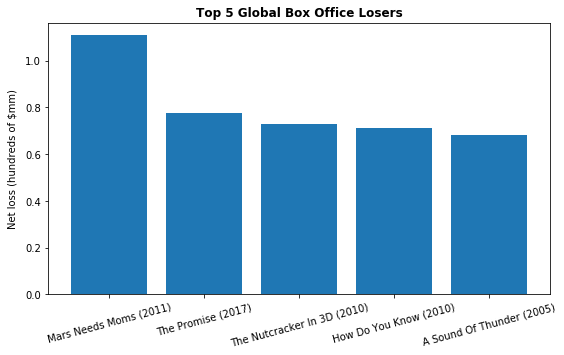

In [79]:
top_5_losers = df_model_data.sort_values(by=["Net_Profit"]).head(5)

fig, ax = plt.subplots(figsize=(9,5))
plt.bar(top_5_losers["Title"],-top_5_losers["Net_Profit"]/1e8)
ax.set_title("Top 5 Global Box Office Losers", weight="bold")
ax.set_ylabel("Net loss (hundreds of $mm)", labelpad=8)
plt.xticks(rotation=15);

### Plot of Budget vs Box Office

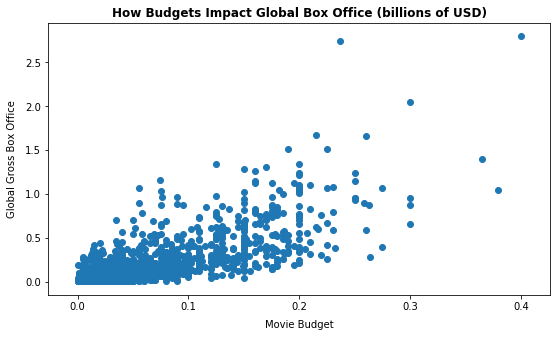

In [80]:
fig, ax = plt.subplots(figsize=(9,5))
plt.scatter(df_model_data['Budget']/1e9,df_model_data["Global_Sales"]/1e9,alpha=1)
ax.set_title("How Budgets Impact Global Box Office (billions of USD)", weight="bold")
ax.set_xlabel("Movie Budget", labelpad=8)
ax.set_ylabel("Global Gross Box Office", labelpad=8);

### Box Office vs count of other movies released in same month and year

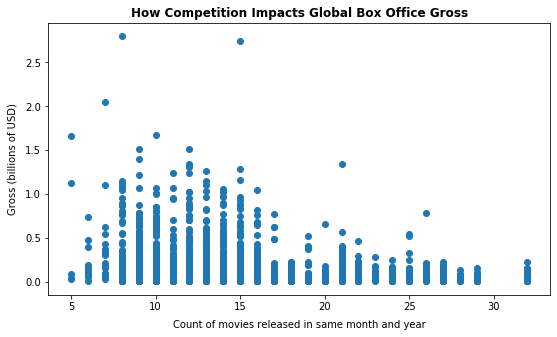

In [81]:
fig, ax = plt.subplots(figsize=(9,5))
plt.scatter(df_model_data['Month_Year_Count'], df_model_data["Global_Sales"]/1e9,alpha=1)
ax.set_title("How Competition Impacts Global Box Office Gross", weight="bold")
ax.set_xlabel("Count of movies released in same month and year", labelpad=8)
ax.set_ylabel("Gross (billions of USD)", labelpad=8);

### Movie Count by Release Month

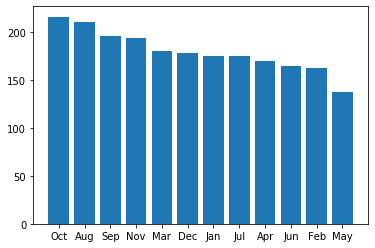

In [99]:
rel_month_grouped = df_model_data["ReleaseDate"].apply(lambda x: x.strftime("%b")).value_counts()
plt.bar(rel_month_grouped.index, rel_month_grouped.values);

### Runtime vs Box Office Sales

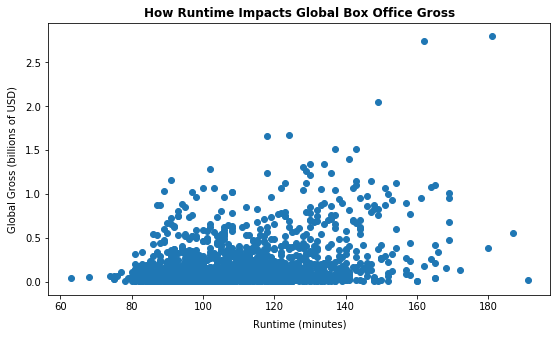

In [83]:
fig, ax = plt.subplots(figsize=(9,5))
plt.scatter(df_model_data['Runtime'],df_model_data["Global_Sales"]/1e9,alpha=1)
ax.set_title("How Runtime Impacts Global Box Office Gross", weight="bold")
ax.set_xlabel("Runtime (minutes)", labelpad=8)
ax.set_ylabel("Global Gross (billions of USD)", labelpad=8);